In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

In [ ]:
NUM_CLASSES=10
img_rows,img_cols = 28, 28

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
def load_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(64,activation='relu',input_shape=(img_rows,img_cols)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(NUM_CLASSES,activation='softmax'))
  return model

In [ ]:
model = load_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 64)            1856      
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               229504    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
__________________________________________________

In [ ]:
loss_function=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss_function,metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.6606 - accuracy: 0.7942 - val_loss: 0.1182 - val_accuracy: 0.9629
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1471 - accuracy: 0.9563 - val_loss: 0.0875 - val_accuracy: 0.9728
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1014 - accuracy: 0.9703 - val_loss: 0.0789 - val_accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0778 - accuracy: 0.9764 - val_loss: 0.0673 - val_accuracy: 0.9784
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.0665 - val_accuracy: 0.9797


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0665 - accuracy: 0.9797


[0.06652023643255234, 0.9797000288963318]

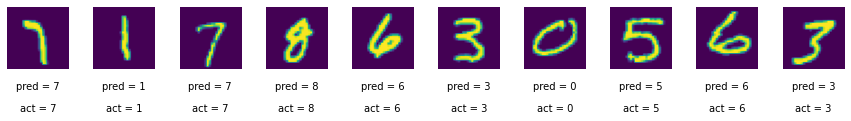

In [ ]:
TAG = np.array(['0','1','2','3','4','5','6','7','8','9'])
preds = model.predict(x_test)
preds_single = TAG[np.argmax(preds, axis = -1)]
#actual_single = TAG[np.argmax(y_test, axis = -1)]
actual_single = y_test
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)